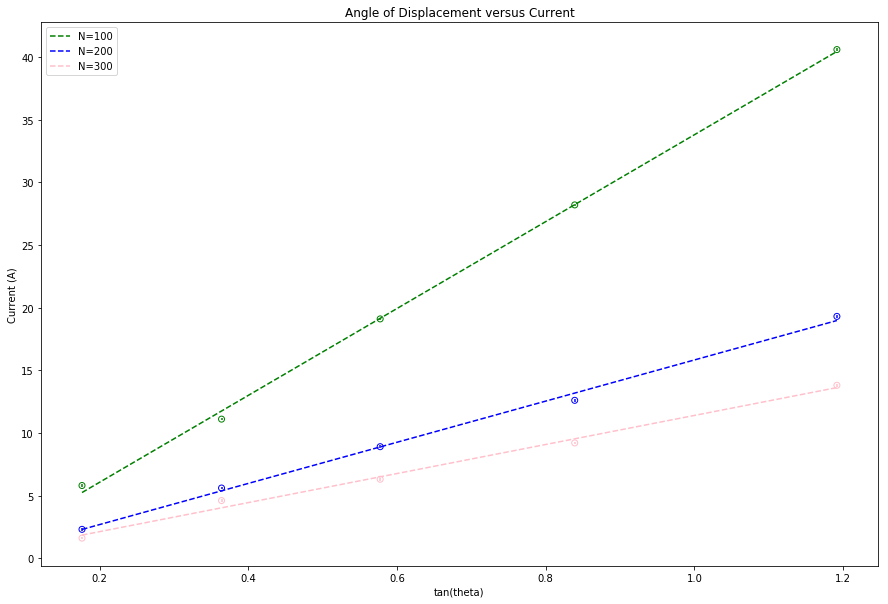

In [52]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data

xvariable_100 = np.array([0.1763, 0.3640, 0.5774, 0.8391, 1.1918]) #what are units?
yvariable_100 = np.array([5.8, 11.1, 19.1, 28.2, 40.6]) #what are units?

yvariable_200 = np.array([2.3, 5.6, 8.9, 12.6, 19.3]) #what are units?

yvariable_300 = np.array([1.6, 4.6, 6.3, 9.2, 13.8]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_yvariable_100 = np.array([0.1, 0.1, 0.1, 0.1, 0.1])



#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = xvariable_100   #this should be the array you want to plot on the x axis
y1 = yvariable_100
dy = err_yvariable_100  #this should be your error in y array

y2 = yvariable_200

y3 = yvariable_300

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y1,1,w=dy)
b2,m2=np.polynomial.polynomial.polyfit(x,y2,1,w=dy)
b3,m3=np.polynomial.polynomial.polyfit(x,y3,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x
fit2 = b2+m2*x
fit3 = b3+m3*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept


#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y1,dy)
N2 = LLSFD2(x,y2,dy)
N3 = LLSFD2(x,y3,dy)
#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--', label='N=100')
plt.scatter(x, y1, color='green', marker='o', facecolor='none')

plt.plot(x, fit2, color='blue', linestyle='--', label='N=200')
plt.scatter(x, y2, color='blue', marker='o', facecolor='none')

plt.plot(x, fit3, color='pink', linestyle='--', label='N=300')
plt.scatter(x, y3, color='pink', marker='o', facecolor='none')

plt.legend(loc='upper left')
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('tan(theta)')
plt.ylabel('Current (A)')
plt.title('Angle of Displacement versus Current')
 
plt.errorbar(x, y1, yerr=dy, color='green', xerr=None, fmt="none") #don't need to plot x error bars
plt.errorbar(x, y2, yerr=dy, color='blue', xerr=None, fmt="none")
plt.errorbar(x, y3, yerr=dy, color='pink', xerr=None, fmt="none")
 


plt.show()

Text(0.05, 0.8, 'Goodness of fit = 7.59E+01')

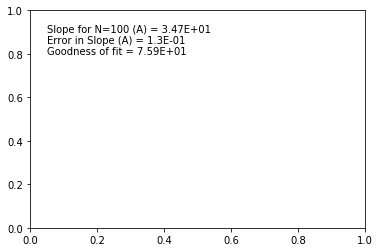

In [53]:
plt.annotate('Slope for N=100 (A) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
plt.annotate('Error in Slope (A) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction') 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
            (0.05, 0.80), xycoords='axes fraction')

Text(0.05, 0.8, 'Goodness of fit = 8.43E+04')

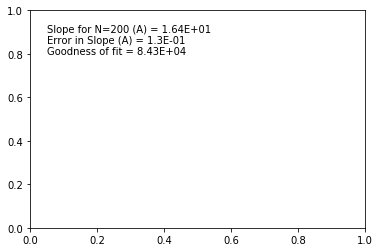

In [54]:
plt.annotate('Slope for N=200 (A) = {value:.{digits}E}'.format(value=m2, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
plt.annotate('Error in Slope (A) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction') 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N2, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

Text(0.05, 0.8, 'Goodness of fit = 1.30E+05')

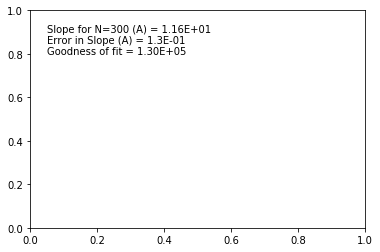

In [55]:

plt.annotate('Slope for N=300 (A) = {value:.{digits}E}'.format(value=m3, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
plt.annotate('Error in Slope (A) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction') 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N3, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
